Chocolate! - Mini Project

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB
['Company\xa0\n(Maker-if known)', 'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rat

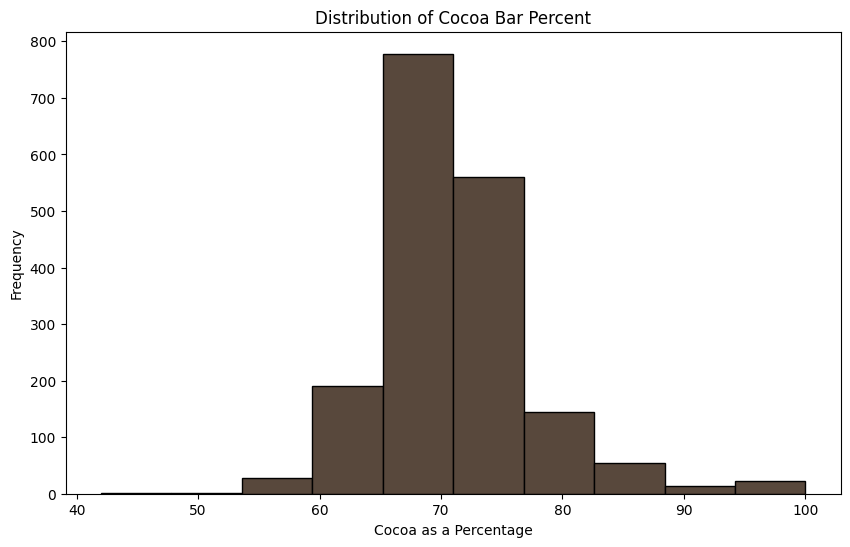

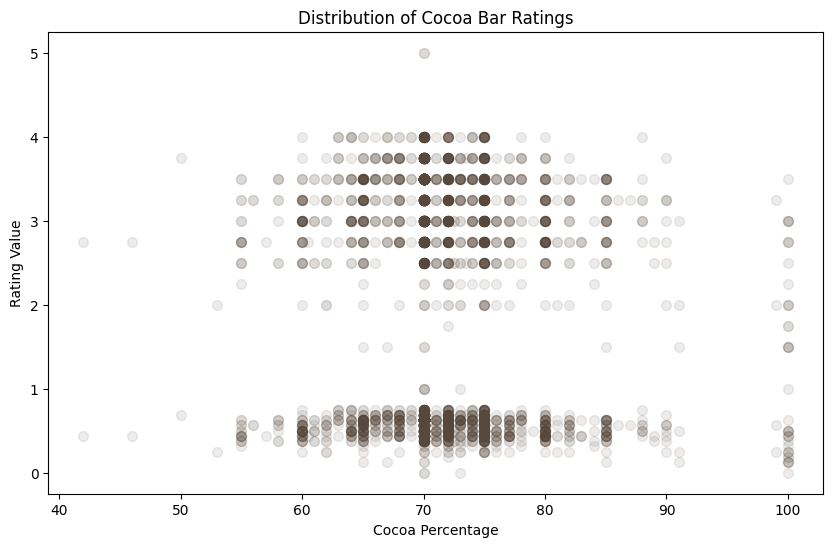

In [2]:
# Step 1 - download and read the dataset into a Pandas data frame.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset_orig = pd.read_csv('flavors_of_cacao.csv')

dataset_orig.head(6)
dataset_orig.info()
print(dataset_orig.columns.tolist())
#print(dataset.isna().sum())  #Prints dataset and shows where sum = 0 

#Step 2 - Drop rows with missing values, DataFrame with NA entries dropped from it or None if
dataset= dataset_orig.dropna().copy()

# Step 3 - Exlplore the Dataset. 

# How many tuples are there in the dataset?  () is tuple, [] is list.
number_of_tuples = len(dataset)
print("Number of Tuples:", number_of_tuples)

# How many unique company names are there in the dataset?
unique_comp_names = dataset.columns.tolist()  

# How many company names are there in the dataset?
number_of_company_names = dataset['Company\xa0\n(Maker-if known)'].unique()
num_of_comp_names = np.shape(number_of_company_names)[0]
print("Number of Company Names:", num_of_comp_names)


# How many reviews are made in 2013 in the dataset?
num_of_reviews_2013 = dataset[dataset['Review\nDate'] == 2013].shape[0]
print("The number of reviews in 2013:", num_of_reviews_2013)

# In the BeanType Column, how many missing values are there?
missing_beantype = dataset_orig['Bean\nType'].isnull().sum()
print ('How many missing values are the in the BeanType Column:', missing_beantype)

#Step 4 Convert and Visualize: Prepare 'Cocoa_Percent' for visualization ---

# Change the type of values in the column 'Cocoa_Percent' from string to numerical
dataset['Cocoa\nPercent'] = dataset['Cocoa\nPercent'].astype(str)
# Remove '%' sign and convert to float
dataset['Cocoa\nPercent'] = dataset['Cocoa\nPercent'].str.replace('%', '')
dataset['Cocoa\nPercent'] = dataset['Cocoa\nPercent'].astype(float)

# Create a Histogram with the rating column - using MetaPlotLib plt.hist(x, y)
# Make the chart pretty and usefull with labels
plt.figure(figsize=(10, 6))
plt.hist(dataset['Cocoa\nPercent'], bins=10, edgecolor='black', color="#58483C")
plt.title('Distribution of Cocoa Bar Percent')
plt.xlabel('Cocoa as a Percentage')
plt.ylabel('Frequency')


#--- Step 5 --> Visualize with Scatter Plot   ---
#  Plot the converted numerical Cocoa Percent values against the Rating values!
#  From what you see, does more cocoa in a bar correspond to a higher rating?
#  Hint: Try a scatter plot with small alpha, e.g., 0.1, to flush out the density of each point.

# Make Histogram, then make it understandable
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Cocoa\nPercent'], dataset['Rating'], alpha=0.1, color="#58483C", s=50)
plt.title('Distribution of Cocoa Bar Ratings')
plt.xlabel('Cocoa Percentage')
plt.ylabel('Rating Value')

#--- Step 6 --> Normalize the Rating Column.  ---
# Normalizing the Rating column using Min-Max scaling (Pandas/NumPy)
min_rating = dataset['Rating'].min()
max_rating = dataset['Rating'].max()
dataset['Rating_Normalized'] = (dataset['Rating'] - min_rating) / (max_rating - min_rating)

plt.scatter(dataset['Cocoa\nPercent'], dataset['Rating_Normalized'], alpha=0.1, color="#58483C", s=50)  #see what the Normalized data looks like

#--- Step 8 --> Encoding with One-Hot Encoding would be best as there is no relation to name and location.
# Suppose we are interested in the company’s names and locations for some collective analysis.
# Encode the two categorical columns with the encoder you think is best for the job!

company_name = 'Company\xa0\n(Maker-if known)'
company_loc = 'Company\nLocation'
dataset_to_encode = dataset[[company_name, company_loc ]] # New Dataset with two columns
# Apply One-Hot - use panda's get_dummies
dataset_encoded = pd.get_dummies(dataset_to_encode, columns=[company_loc, company_name])

print (dataset_encoded)





